## Daniel Hedji, V00887395
### Computational 6
In this assignment, I had decided to use a slightly modified code from the fifth computational assignment to solve the scattering angle for the quantities given in the data sets provided. This entailed modifying each equation such that it used $\frac{L}{m}$ instead of given quantities that were arbitrarily chosen. The given scattering angles were compared to the found scattering angles, and the assumed potential was changed accordingly.

In [264]:
import numpy as np
import matplotlib.pyplot as plt

In [265]:
#Data set 1
vo1 = 120 #in pixels/s
l_m_1 = [5000,3700,2600] #in pixels^2/s
sc_ang_1 = [0.84,1.08,1.53] #in rad

In [266]:
#Data set 2
vo2 = 140 #in pixels/s
l_m_2 = [3000,1200,5300,5000] #in pixels^2/s
sc_ang_2 = [1.83,2.47,0.87,0.98] #in rad

In [267]:
#Data set 3
R = 22
vi = [154.7,136.5,122.4,141.4,141.7,143.8,147.7,116.3,118.4,122.7,180.3,213.2,210.8,187.0,198.8,190.0,165.7,137.0,153.253928631349,148.761379642823,206.761688643166,163.415568370742,167.645516643504]
L_m = [-5089,-2949,-5020,-1237,-5323,-4958,-4723,-3728,-2559,-8280,-9441.2,-13567.2,-12361.9,-4671.2,-10229.1,-9156.4,-1093.3,-2347.2,-3500.00550988241,-4579.3508729139,-3493.38429864972,-6371.37628230192,-4290.13377665331]
th = [1.165,1.830,0.837,2.466,0.868,0.978,1.154,1.077,1.531,0.298,0.346,0.160,0.184,1.447,0.273,0.339,2.827,1.940,1.67443293810652,1.16612437111815,2.23808950073919,0.818851860683304,2.70735679131889]

To have an intial starting point for the potential of this system, I used the formula $\bar{A}(\bar{r}) = \frac{\mu_0}{4\pi}\oint_C \frac{I}{|\bar{r}-\bar{r'}|} \,\bar{dl'}$

Using the generalized vector form of $\bar{r} = x\hat{x} + y\hat{y} +  z\hat{z} = rcos\theta cos\phi\hat{x} + rsin\theta sin\phi\hat{y} +  rcos\theta\hat{z}$. Note that $\bar{r'}$ follows a similar formula

Using a Taylors expansion for the vector terms in $\bar{A}$ results in $\frac{1}{r} + \frac{r'sin\theta cos(\phi - \phi')}{r^2}$. Solving this integral gives a potential for this configuration that is proportional to $sin\theta$

In [297]:
def scatter(L_m,vo,R):
    #Initially chosen quantities
    s = 0.01
    alph = 1.4
    r = R
    ts = 1e-4
    #Initial conditions
    xo = np.sqrt(r**2 - s**2)
    th = np.arctan(s/xo)
    r_d = vo * xo / r
    th_d = L_m / r**2
    #Potential that was assumed at the beginning
    term = np.sin(th) 
    
    for i in range(10000):
        #r acceleration eom found through Routian
        r_dd = L_m ** 2 / r**3 + (term)
        #angular speed formula
        th_d = L_m / r**2
        #Forward integration
        r = 0.5 * r_dd * ts**2 + r_d * ts + r
        r_d = r_dd * ts + r_d
        th = th_d * ts + th
    
    return th

In [305]:
#Getting scattering angles for the given data set (#3)
ths_3 = []
for i,j in zip(vi,L_m):
    ths_3.append(scatter(j,i,R))

Text(0.5, 1.0, '$\\theta$ as a function of $\\frac{L}{m}$ for data set 3')

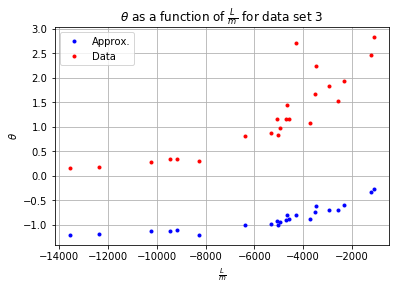

In [349]:
#Plotting
plt.plot(L_m,ths_3,'b.', label = "Approx.")
plt.plot(L_m,th,'r.',label = "Data")
plt.grid()
plt.legend()
plt.xlabel("$\\frac{L}{m}$")
plt.ylabel("$ \\theta$")
plt.title("$\\theta$ as a function of $\\frac{L}{m}$ for data set 3")

In [295]:
#Getting scattering angles for the given data set (#1)
ths_1 = []
for i in l_m_1:
    ths_1.append(scatter(i,vo1,R))

Text(0.5, 1.0, '$\\theta$ as a function of $\\frac{L}{m}$ for data set 1')

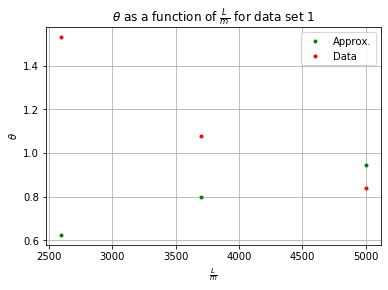

In [348]:
#Plotting
plt.plot(l_m_1, ths_1,'g.',label = "Approx.")
plt.plot(l_m_1,sc_ang_1,'r.',label = "Data")
plt.grid()
plt.legend()
plt.xlabel("$\\frac{L}{m}$")
plt.ylabel("$ \\theta$")
plt.title("$\\theta$ as a function of $\\frac{L}{m}$ for data set 1")

In [290]:
#Getting scattering angles for the given data set (#2)
ths_2 = []
for i in l_m_2:
    ths_2.append(scatter(i,vo2,R))

Text(0.5, 1.0, '$\\theta$ as a function of $\\frac{L}{m}$ for data set 2')

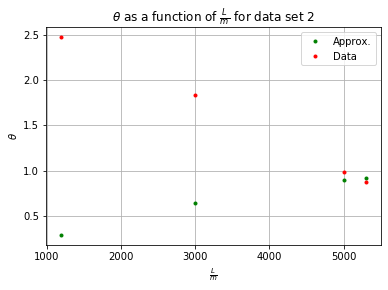

In [347]:
#Plotting
plt.plot(l_m_2, ths_2,'g.',label = "Approx.")
plt.plot(l_m_2,sc_ang_2,'r.',label = "Data")
plt.grid()
plt.legend()
plt.xlabel("$\\frac{L}{m}$")
plt.ylabel("$ \\theta$")
plt.title("$\\theta$ as a function of $\\frac{L}{m}$ for data set 2")

It is noticed that for each data set, the approximated data had similar behaviour, with each set of data being offset by a constant value for each theta. From this, it is concluded that the potential is sinusoidal in nature. Some examples of potential constants are shown below

Text(0.5, 1.0, '$\\theta$ as a function of $\\frac{L}{m}$ for data set 1')

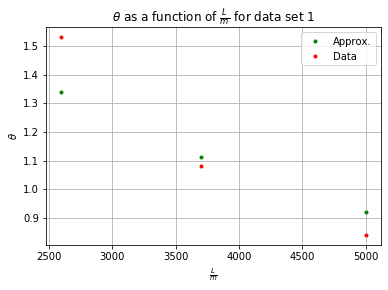

In [344]:
#Plotting
plt.plot(l_m_1, 2.15-1.3*np.array(ths_1),'g.',label = "Approx.")
plt.plot(l_m_1,sc_ang_1,'r.',label = "Data")
plt.grid()
plt.legend()
plt.xlabel("$\\frac{L}{m}$")
plt.ylabel("$ \\theta$")
plt.title("$\\theta$ as a function of $\\frac{L}{m}$ for data set 1")

Text(0.5, 1.0, '$\\theta$ as a function of $\\frac{L}{m}$ for data set 2')

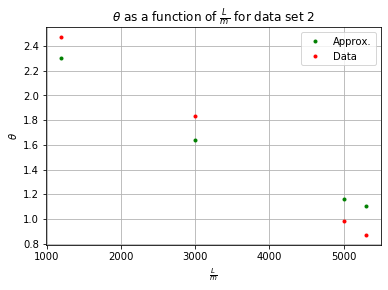

In [345]:
#Plotting
plt.plot(l_m_2, 2.85-1.9*np.array(ths_2),'g.',label = "Approx.")
plt.plot(l_m_2,sc_ang_2,'r.',label = "Data")
plt.grid()
plt.legend()
plt.xlabel("$\\frac{L}{m}$")
plt.ylabel("$ \\theta$")
plt.title("$\\theta$ as a function of $\\frac{L}{m}$ for data set 2")

Text(0.5, 1.0, '$\\theta$ as a function of $\\frac{L}{m}$ for data set 3')

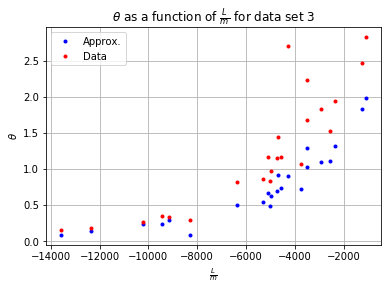

In [346]:
#Plotting
plt.plot(L_m,2.5+2*np.array(ths_3),'b.', label = "Approx.")
plt.plot(L_m,th,'r.',label = "Data")
plt.grid()
plt.legend()
plt.xlabel("$\\frac{L}{m}$")
plt.ylabel("$ \\theta$")
plt.title("$\\theta$ as a function of $\\frac{L}{m}$ for data set 3")